# Inaugural Project: Time Use of Couples

Imports and set magics:

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
import HouseholdSpecializationModel as HSM

#from HouseholdSpecializationModel import HouseholdSpecializationModelClass

model = HSM.HouseholdSpecializationModelClass()
print(model.par.omega)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0.5


# Question 1:

In this quesiton we look at what happens when varying $\alpha$ and $\sigma$

[0.125, 0.8, 4.333333333333333]
[1.5714285714285714, 2.4, 4.333333333333333]


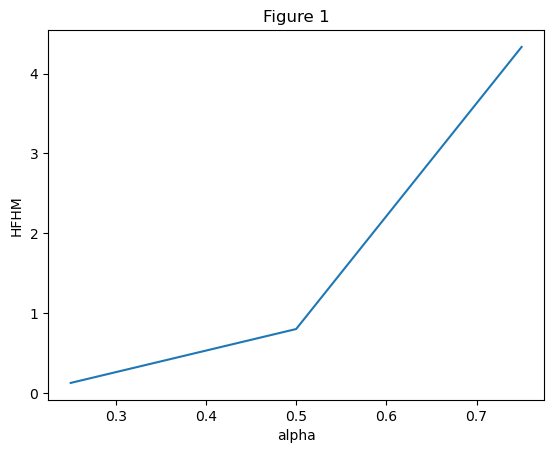

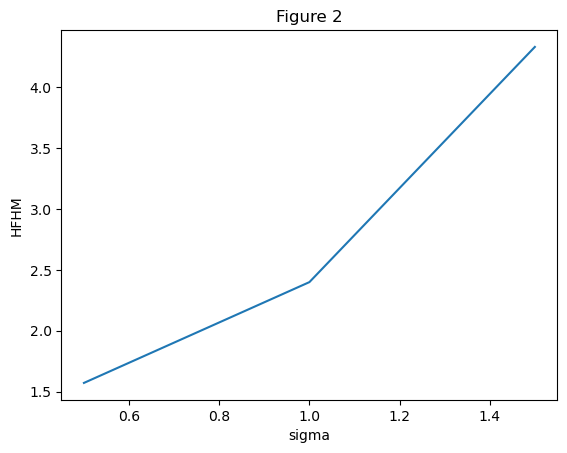

In [83]:
# Parameters 
alphas = np.array([0.25,0.50,0.75])
sigmas = np.array([0.5,1.0,1.5])

# Varying alphas in discrete choice model 
HFHM = [] 

model.solve_discrete() # to reset alpha and sigma 

for alpha in alphas:
    model.par.alpha = alpha
    opt = model.solve_discrete()
    HFHM.append(opt.HF/opt.HM)
print(HFHM)

# Plotting 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(alphas, HFHM)
ax.set_title('Figure 1')
ax.set_xlabel('alpha')
ax.set_ylabel('HFHM');


# Varying sigmas in discret choice model 
HFHM = [] 

model.solve_discrete() # to reset alpha and sigma 

for sigma in sigmas:
    model.par.sigma = sigma
    opt = model.solve_discrete()
    HFHM.append(opt.HF/opt.HM)
print(HFHM)

# Plotting 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(sigmas, HFHM)
ax.set_title('Figure 2')
ax.set_xlabel('sigma')
ax.set_ylabel('HFHM');


# Question 2

Explain your code and procedure

[2.0794415416798357, 1.6094379124341003, 1.540445040947149, 1.540445040947149, 1.466337068793427]
[-0.2231435513142097, -0.10536051565782628, 0.0, 0.09531017980432493, 0.1823215567939546]


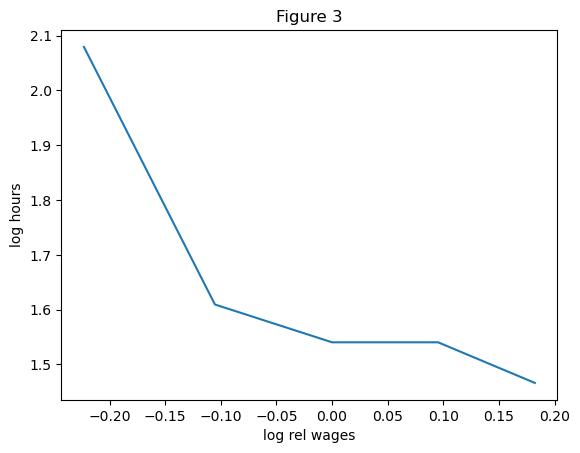

In [84]:
# Logarithmic relative housheold working hours
logHFHM = []
wF_vec = model.par.wF_vec

for wF in wF_vec:
    model.par.wF = wF
    opt = model.solve_discrete()
    logHFHM.append(np.log(opt.HF/opt.HM))
print(logHFHM)

# Logarithmic relative wages 
logWFWM = []            

for wF in wF_vec:
    model.par.wF = wF
    opt = model.solve_discrete()
    logWFWM.append(np.log(wF/model.par.wM))
print(logWFWM)

# Plotting relative home working hours against relative wages 

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(logWFWM,logHFHM)

ax.set_title('Figure 3')
ax.set_xlabel('log rel wages')
ax.set_ylabel('log hours');


# Question 3

Explain your code and procedure

ADD CONCISE CONLUSION.